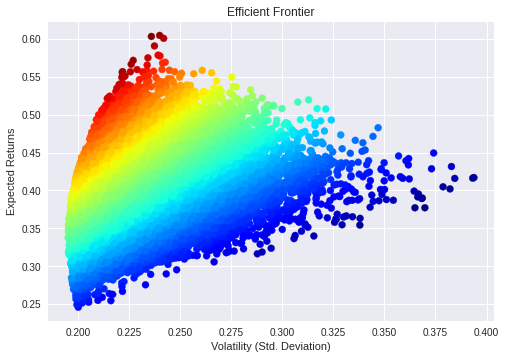

In [12]:
# 필요한 라이브러리를 임포트한다.
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib as mpl

# 다섯 개 종목(애플, 페이스북, 아마존, 제너럴일렉트릭, 테슬라)을 갖고 
# 비중을 무수히 바꿔 포트폴리오를 만들 것이다.
tickers = [ 'AAPL', 'F', 'AMZN', 'GE', 'TSLA' ]

# 수정주가를 저장할 데이터프레임 변수(adjCose)를 미리 만들어둔다.
pxclose = pd.DataFrame()

# for 루프로 다섯 개 종목을 반복하면서 반복 중에 pandas.datareader를 이용해
# 야후 파이낸스에서 일간 주가 데이터를 가져온다.
for t in tickers:
  pxclose[t] = web.DataReader( t, data_source='yahoo'
    , start='01-01-2019', end='31-12-2019' )[ 'Adj Close' ]

# 종가의 수익률을 계산한다.
ret_daily = pxclose.pct_change()

# 종가수익률 평균에 250(1년 중 시장이 열리는 일수)을 곱해 기대수익률을 만든다.
ret_annual = ret_daily.mean() * 250

# 일간수익률의 공분산을 계산하고 연간 단위로 만든다.
cov_daily = ret_daily.cov()
cov_annual = cov_daily * 250

#  cov_annual 앞부분 확인
ret_daily.head()

# 포트폴리오 수익률, 변동성, 투자 비중을 저장할 변수를 미리 준비한다.
p_returns = []
p_volatility = []
p_weights = []

# len() 함수로 투자자산의 수를 계산한다.
n_assets = len(tickers)

# 다섯 개 종목으로 투자 비중을 바꿔 3만 개의 포트폴리오를 만들 것이다.
n_ports = 30000

# n_ports 만큼 반복하면서 자산의 투자 비중을 랜덤하게 만들고 
# 포트폴리오의 기대수익률, 변동성을 계산한다.
# 계산한 수익률, 변동성, 투자 비중은 앞서 미리 준비한 변수, p_returns,
# p_volability, p_weights에 저장한다.
for s in range (n_ports) :

# np.random.random() 함수로 난수 생성
  wgt = np.random.random(n_assets)

# 투자 비중 합계 100%를 위해 각 난수를 남수 합으로 나눈다
  wgt /= np.sum( wgt )

# 투자 비중 * 기대수익률로 기대수익률 계산
  ret = np.dot( wgt, ret_annual )

# 변동상 계산 
  vol = np.sqrt( np.dot( wgt.T, np.dot( cov_annual, wgt ) ) )

# 계산한 수익률 추가
  p_returns.append( ret )

# 변동성 추가
  p_volatility.append( vol )

# 투자 비중 추가
  p_weights.append( wgt )

# 완성된 3만 개의 포트폴리오를 차트로 그린다
# np.arrary로 변환한다.
p_volatitlity = np.array( p_volatility )
p_returns = np.array( p_returns )

# 색상을 n_ports만큼 만든다.
colors = p_returns / p_volatitlity

# Matplotlib는 차트에 대한 여러 가지 스타일을 지정할 수 있다.
# print( plt.style.available ) 명령으로 
# 다음과 같이 사용 가능한 스타일을 알 수 있다.
# print( plt.style.available )

plt.style.use( 'seaborn' )

# 분산 차트 설정
plt.scatter( p_volatility, p_returns, c=colors, marker='o', cmap=mpl.cm.jet )

# x축 이름
plt.xlabel( 'Volatility (Std. Deviation)' )

# y축 이름
plt.ylabel( 'Expected Returns' )

# 차트 제목
plt.title( 'Efficient Frontier' )
plt.show()